<a href="https://colab.research.google.com/github/brunnadeandrade/data_science/blob/master/Analisando_os_Dados_do_Airbnb_de_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Roma, Itália*

<p align="center"><img src="https://cdn.pixabay.com/photo/2017/12/15/19/13/rome-3021586_960_720.jpg"></p>


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa. 

No final de 2019, a Startup fundada 11 anos atrás, já havia **hospedado mais de 750 milhões** de pessoas em 100 mil cidades de mais 220 países e regiões, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma e ver quais insights podem ser extraídos a partir de dados brutos.**

##**Roma**
Roma, capital da Itália, é a maior e mais populosa cidade do país. É também a cidade com a maior concentração de patrimônio histórico e arquitetônico do mundo. Dentre os monumentos mais famosos estão o **Coliseu**, o **Pantheon**, a **Fonte de Trevi** e a **Cúpula da Basílica de São Pedro**. Estima-se que Roma receba, em média, 7 a 10 milhões de turistas por ano.

Com tamanho fluxo de pessoas, o Airbnb em Roma é de suma importância para aumentar a competitividade do setor hoteleiro e a gama de ofertas de estadia. Em 2018, Roma instituiu uma taxa turística aplicada a aluguel de curto prazo, como o Airbnb.


Mapa de Roma<p align="center"><img src="https://2.bp.blogspot.com/-SQJk2wIpTdI/V8OhqnYaGyI/AAAAAAAARUI/-UljdehL3vIHQdRwDO-9dGMRCMy1VeGIgCLcB/s1600/nmp_mun_d0.gif" height="400px"></p>
[Fonte](https://passioneperviaggio.blogspot.com/2016/09/bairros-e-municipios-de-roma.html)

## Obtenção dos Dados

Todos os dados utilizados na análise foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para realizar uma análise exploratória inicial, será baixado apenas o seguinte arquivo:

* 'listings.csv' - *Summary information and metrics for listings in Rome (good for visualisations).*

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-04-29/visualisations/listings.csv")

## Análise dos Dados

Como início desta etapa, será feito um dicionário de variáveis para melhor entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de identificação do imóvel
* `name` - nome do imóvel anunciado
* `host_id` - número de identificação do proprietário (anfitrião) do imóvel
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não possui valor válido
* `neighbourhood` - nome do bairro onde está localizado o imóvel
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - informação do tipo de quarto oferecido
* `price` - preço de aluguel do imóvel
* `minimum_nights` - quantidade mínima de noites exigida para reservar
* `number_of_reviews` - número de avaliações recebidas pelo imóvel
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade do imóvel dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.11,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,100,1,55,2017-10-31,0.39,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.15,6,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,142,2020-01-03,1.29,1,345
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,95,3,39,2015-07-19,0.34,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que o conjunto de dados possui e verificar os tipos de variáveis de cada coluna.

Importante destacar que este *dataset* baixado é a versão "resumida" disponibilizada pelo Airbnb (`listings.csv`). A versão mais completa contém 31215 entradas e 106 variáveis (`listings.csv.gz`)

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 31215
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Vamos agora verificar a quantidade de valores ausentes no *dataset* para entender se esses valores são significativos em relação ao número total de entradas. A qualidade de um *dataset* está diretamente relacionada ao volume de valores ausentes.

A partir dos valores temos que:

* A coluna `neighbourhood`não possui nenhum valor inserido, portanto, 100% de valores nulos.
* As colunas `reviews_per_month`e `last_review`possuem quase 20% de valores nulos.
* A coluna `name`possui aproximadamente 0,3% de valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197437
last_review                       0.197437
name                              0.000320
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos identificar a distribuição das variáveis por meio do histograma.

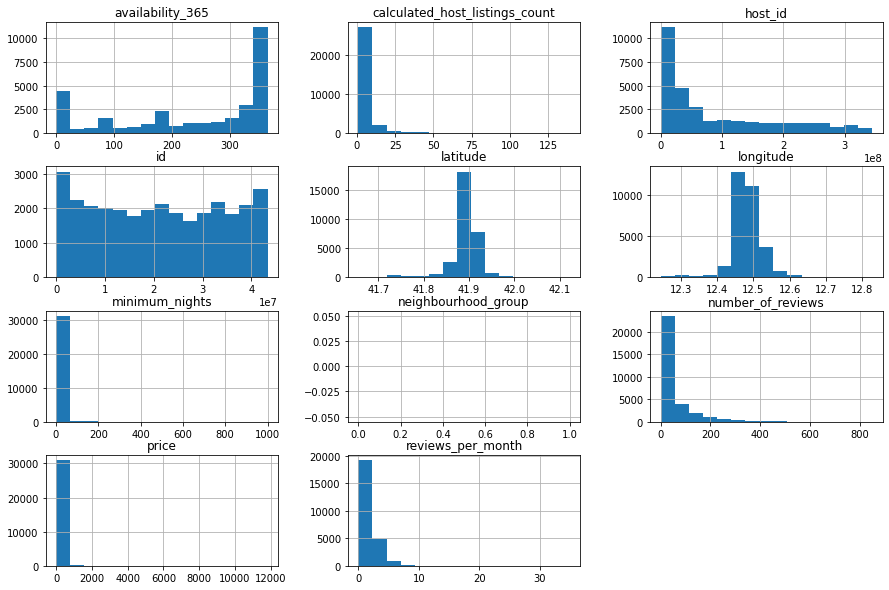

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível identificar indícios de presença de *outliers*.

*Outliers* são dados com valores atípicos, ou seja, valores muito distantes dos demais dados.

Observe, por exemplo, as variáveis `calculated_host_listings_count`, `minimum_nights`e `price`. Verifica-se no histograma que os valores se concentram na extremidade pois possivelmente não seguem uma distribuição uniforme e são distorcidos na representação gráfica.

Para confirmar a presença de *outliers* utilizaremos:

* Resumo estatístico dos dados por meio do método `describe()`
* Plotar `boxplots`para a variável.

In [0]:
# ver resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31215.000000,31215.000000,31215.000000,25052.000000,31215.000000,31215.000000
mean,111.487041,3.080154,43.126862,1.460446,7.181643,235.998270
std,276.420392,15.307859,70.042274,1.518958,16.905015,132.775951
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.280000,1.000000,124.000000
50%,75.000000,2.000000,12.000000,0.930000,2.000000,293.000000
75%,115.000000,3.000000,55.000000,2.220000,6.000000,357.000000
max,11818.000000,1000.000000,850.000000,34.960000,139.000000,365.000000


Através do resumo estatístico acima observamos que:

* A variável `price` possui 75% do valor abaixo de 115 e seu valor máximo é 11.818.
* A variável `minimum_nights` (quantidade mínima de noites) possui 75% do valor está abaixo de 3 e seu valor máximo está acima de 365 dias no ano.
* A variável `calculated_host_listings_count` (quantidade de imóveis do mesmo anfitrião) possui valor máximo de 139 e 75% de seu valor está abaixo de 6.

### Boxplot para price

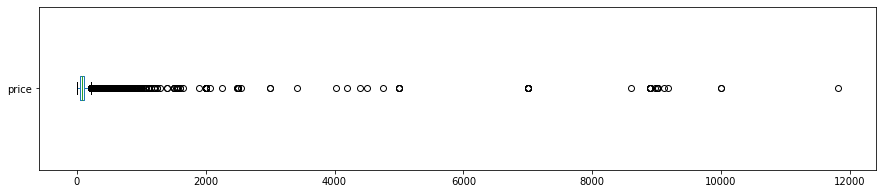


price: valores acima de 400
661 entradas
2.1176%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 400 para price
print("\nprice: valores acima de 400")
print("{} entradas".format(len(df[df.price > 400])))
print("{:.4f}%".format((len(df[df.price > 400]) / df.shape[0])*100))


### Boxplot para minimum_nights

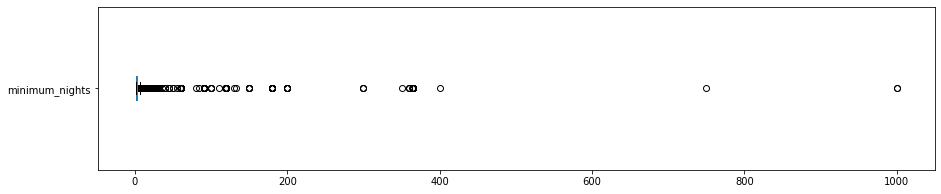

minimum_nights: valores acima de 15:
522 entradas
1.6723%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
    
# ver quantidade de valores acime de 15 dias para minimum_nights
print("minimum_nights: valores acima de 15:")
print("{} entradas".format(len(df[df.minimum_nights > 15])))
print("{:.4f}%".format((len(df[df.minimum_nights > 15]) / df.shape[0])*100))

### Boxplot para calculated_host_listings_count

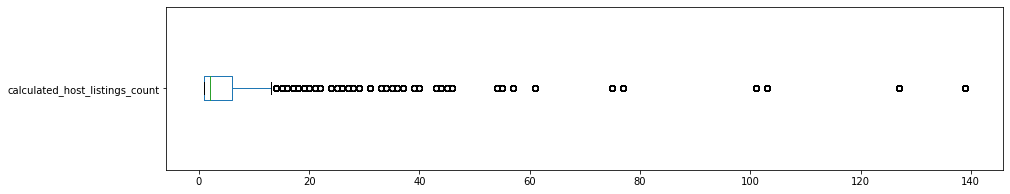

calculated_host_listings_count: valores acima de 15:
2652 entradas
8.4959%


In [0]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 15 imóveis para calculated_host_listings_count
print("calculated_host_listings_count: valores acima de 15:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 15])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 15]) / df.shape[0])*100))

### Histogramas sem *outliers*

Após identificar *outliers* nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, vamos fazer a limpeza do *DataFrame* delas e plotar novamente o histograma.


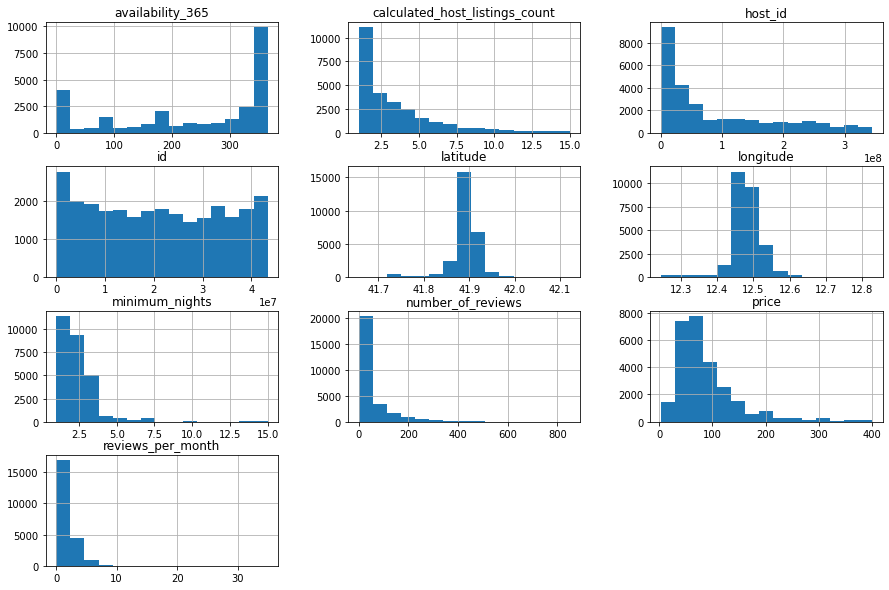

In [0]:
# remover outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 15].index, axis=0, inplace=True)

# remover neighbourhood_group" pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis?**

Entende-se por correlação a interdependência entre duas coisas. Aqui pretendemos buscar relação ou semelhança entre duas variáveis.

Vamos medir essa relação e verificar sua intensidade através do coeficiente de correlação. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [0]:
# criar uma matriz de correlação
corr=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
price,1.000000,0.017622,-0.052884,-0.029061,0.137776,0.146594,0.099877,-0.081995
minimum_nights,0.017622,1.000000,-0.005747,-0.088723,-0.096449,-0.074013,-0.025966,-0.011204
number_of_reviews,-0.052884,-0.005747,1.000000,0.770686,-0.004678,0.113530,0.018696,0.026255
reviews_per_month,-0.029061,-0.088723,0.770686,1.000000,0.001633,0.074920,0.035263,0.045615
calculated_host_listings_count,0.137776,-0.096449,-0.004678,0.001633,1.000000,0.146234,0.069295,0.002215
availability_365,0.146594,-0.074013,0.113530,0.074920,0.146234,1.000000,0.058761,-0.039760
latitude,0.099877,-0.025966,0.018696,0.035263,0.069295,0.058761,1.000000,0.239889
longitude,-0.081995,-0.011204,0.026255,0.045615,0.002215,-0.039760,0.239889,1.000000


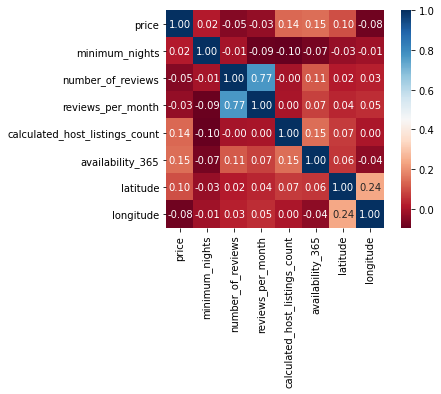

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type`indica o tipo de locação anunciada no Airbnb. Existem opções de alugar o local inteiro, somente um quarto do local, quartos em hotéis ou quartos compartilhados.

Vamos verificar a quantidade de cada tipo de aluguel utilizando o método `vale_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17271
Private room        8759
Hotel room          1277
Shared room          233
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    62.712418
Private room       31.804648
Hotel room          4.636892
Shared room         0.846042
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Vamos comparar agora os bairros com o preço e o tipo de locação para identificar os locais mais caros de Roma. Utilizaremos, para isso, o método `groupby()`.

Após isso, vamos identificar a quantidade de imóveis que existe no bairro mais caro e quanto essa quantidade representa dos imóveis totais.

Pelos resultados vemos que há uma concentração de imóveis no I Centro Storico representando mais de 44% do total de propriedades para locação. Esse também é o bairro mais caro. Possivelmente pelo grande fluxo de turistas na região aumentando a demanda.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              106.980983
XIII Aurelia                   83.536330
XV Cassia/Flaminia             78.700730
II Parioli/Nomentano           77.858166
XII Monte Verde                72.982444
IX Eur                         69.087613
X Ostia/Acilia                 66.575385
XIV Monte Mario                65.793651
VII San Giovanni/Cinecittà     65.571995
VIII Appia Antica              64.051020
Name: price, dtype: float64

In [0]:
# ver preços por bairro e tipo de locação
df_clean.groupby(['neighbourhood', 'room_type']).price.mean().sort_values(ascending=False)[:10]

neighbourhood            room_type      
I Centro Storico         Entire home/apt    119.867693
                         Hotel room          98.781395
X Ostia/Acilia           Shared room         98.500000
XIII Aurelia             Entire home/apt     94.801909
XV Cassia/Flaminia       Hotel room          93.437500
II Parioli/Nomentano     Entire home/apt     91.248311
XV Cassia/Flaminia       Entire home/apt     87.400552
XII Monte Verde          Entire home/apt     83.201251
V Prenestino/Centocelle  Hotel room          81.740741
II Parioli/Nomentano     Hotel room          80.723684
Name: price, dtype: float64

In [0]:
#ver quantidade de imóveis no I Centro Storico e a porcentagem em relação ao total de imóveis
print("{} entradas".format(len(df_clean[df_clean.neighbourhood == "I Centro Storico"].index)))
print("{:.4f}%".format((len(df_clean[df_clean.neighbourhood == "I Centro Storico"].index) / df.shape[0])*100))

13882 entradas
44.4722%


### **Q8. Como é a distribuição dos imóveis pela cidade de Roma?**
As variáveis Latitude e Longitude dos imóveis possibilita plotar cada ponto e mapear os imóveis. Considera-se `x=longitude`e `y=latitude`.

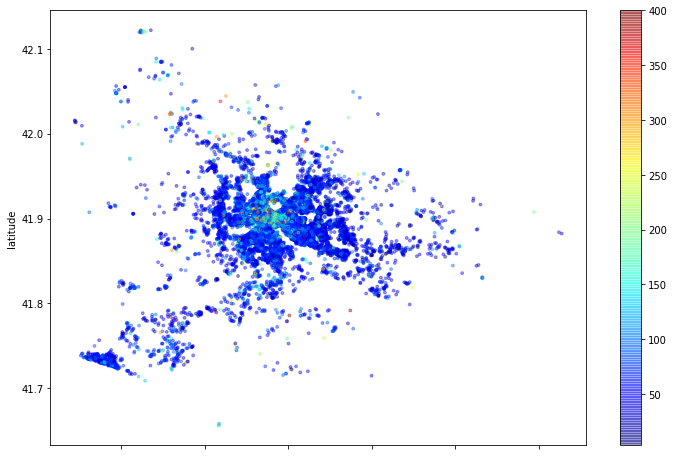

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


A análise realizada neste notebook foi apenas superficial na base de dados do Airbnb.

Apesar disso, foi possível perceber a presença de *outliers* em algumas variáveis podendo distorcer informações de caráter estatístico. 

Nota-se também que existe uma concentração de imóveis em bairros históricos e que essa região é a mais cara. Os imóveis inteiros representam mais de 62% do total de propriedades disponíveis.

Recomenda-se o uso de um *dataset* mais completo para análises mais aprofundadas. Neste notebook foi utilizado uma versão mais resumida apenas para uma abordagem inicial.
